<a href="https://colab.research.google.com/github/havanluan/CS114.K21/blob/master/GiuaKi_Round2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

***Lấy data từ link bằng thư viện pandas***

Dùng method read_csv của pandas để đọc file txt từ link đưa vào.

Method này sẽ đọc link và tạo ra một DataFrame với các cột lần lượt là size và time tương ứng. 

Ta cần rename lại các cột

In [ ]:
import pandas as pd

In [ ]:
url = "http://cs.uit.edu.vn/data2.txt"

In [ ]:
data = pd.read_csv(url, header = None)


In [ ]:
data.columns = ['Size','Time']

In [ ]:
data

,Size,Time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977
...,...,...
71110,4472112,0.350379
71111,5471895,0.429955
71112,9837364,0.801394
71113,9466593,0.776407


## Visualize Data

// Biểu diễn dữ liệu thể hiện sự biến thiên của Time phụ thuộc vào Size

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X = data.values[:,0].copy()
y = data.values[:,1].copy()

In [ ]:
X = np.array(X)
y = np.array(y)

[Text(0.5, 1.0, 'SIZE AND TIME'), Text(0.5, 0, 'Size'), Text(0, 0.5, 'Time')]

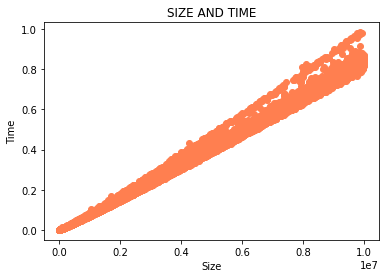

In [ ]:
plt.scatter(X, y, c='coral')
plt.gca().update(dict(title='SIZE AND TIME', xlabel='Size', ylabel='Time'))

## Split Data

***Phân chia dữ liệu thành hai tập train và test, trong đó tập test chiếm 20%***

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Train Model

***Import model từ sklearn***

Train model với tập dữ liệu train và in ra các tham số

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [ ]:
model.fit(X_train[:, np.newaxis], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     8.45467470664112e-08
Model intercept: -0.015846700508174105


## Predict Test Set

***Dùng model đã train ở trên, dự đoán trên tập test***

Màu cam được biểu diễn là các điểm dữ liệu, màu xanh là đường thẳng theo hàm hypothesis có được sau khi train model

In [ ]:
y_pre = model.predict(X_test[:, np.newaxis])

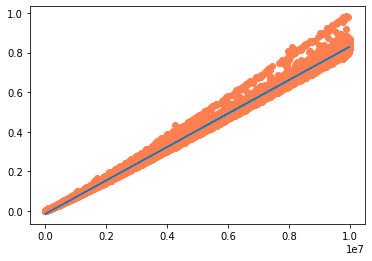

In [ ]:
plt.scatter(X, y, c='coral')
plt.plot(X_test,y_pre)

## Evaluate the model

***Gía trị sai số trung bình***

In [ ]:
evl = abs(y_pre - y_test)

In [ ]:
test_err_tb = evl.mean()
print('Sai số trung bình:', test_err_tb)

Sai số trung bình: 0.008381639984565


In [ ]:
err_tb = evl/y_test
err_tb = err_tb.mean()

In [ ]:
print('Gia tri trung binh phan tram sai so tren gia tri thuc:', err_tb*100,'%')

Gia tri trung binh phan tram sai so tren gia tri thuc: 27.62787238361138 %
